In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

from matplotlib import pyplot
from scipy import stats

from pandas import DataFrame

url = "../matrices_mex/hg19"

barcodes = DataFrame.from_csv(url + "/barcodes.tsv")

print(barcodes)


genes = DataFrame.from_csv(url + "/genes.tsv")

print(genes)
from scipy.io import mminfo,mmread
mminfo(url + "/matrix.mtx")

# matrix = mmread("matrices_mex/hg19/matrix.mtx")

Empty DataFrame
Columns: []
Index: [AAACATACAAAAGC-1, AAACATACAAACAG-1, AAACATACAAACGA-1, AAACATACAAAGCA-1, AAACATACAAAGTG-1, AAACATACAACAGA-1, AAACATACAACCAC-1, AAACATACAACCGT-1, AAACATACAACCTG-1, AAACATACAACGAA-1, AAACATACAACGGG-1, AAACATACAACGTC-1, AAACATACAACTGC-1, AAACATACAAGAAC-1, AAACATACAAGAGT-1, AAACATACAAGATG-1, AAACATACAAGCAA-1, AAACATACAAGCCT-1, AAACATACAAGGCG-1, AAACATACAAGGGC-1, AAACATACAAGGTA-1, AAACATACAAGTAG-1, AAACATACAAGTGA-1, AAACATACAATCGC-1, AAACATACAATGCC-1, AAACATACACACAC-1, AAACATACACACCA-1, AAACATACACACGT-1, AAACATACACACTG-1, AAACATACACAGCT-1, AAACATACACAGTC-1, AAACATACACCAAC-1, AAACATACACCACA-1, AAACATACACCAGT-1, AAACATACACCATG-1, AAACATACACCCAA-1, AAACATACACCCTC-1, AAACATACACCGAT-1, AAACATACACCTAG-1, AAACATACACCTCC-1, AAACATACACCTGA-1, AAACATACACCTTT-1, AAACATACACGACT-1, AAACATACACGCAT-1, AAACATACACGCTA-1, AAACATACACGGAG-1, AAACATACACGGGA-1, AAACATACACGGTT-1, AAACATACACGTAC-1, AAACATACACGTGT-1, AAACATACACGTTG-1, AAACATACACTACG-1, AAACATACACTAGC-1, AAACATACAC

(32738, 737280, 13656983, 'coordinate', 'real', 'general')

In [5]:
matrix = mmread(url+"/matrix.mtx")

In [9]:
def into_pd(m = matrix):
    coo = m.tocoo(copy=False)
    df = pd.DataFrame({'index': coo.row, 'col': coo.col, 'data': coo.data}
                     )[['index', 'col', 'data']].sort_values(['index', 'col']
                     ).reset_index(drop=True)
    print(df)

In [16]:
into_pd(matrix)

          index     col  data
0             8   54435   1.0
1            22   37247   1.0
2            22  213996   1.0
3            22  570980   1.0
4            22  607069   1.0
5            22  671338   1.0
6            22  706289   1.0
7            23   11601   1.0
8            23   42345   1.0
9            23   55471   1.0
10           23   57168   1.0
11           23   86902   1.0
12           23   87768   1.0
13           23   88648   1.0
14           23  100341   1.0
15           23  129127   1.0
16           23  155930   1.0
17           23  173675   1.0
18           23  180858   1.0
19           23  201842   1.0
20           23  202657   1.0
21           23  222199   1.0
22           23  242823   1.0
23           23  251515   1.0
24           23  257718   1.0
25           23  262874   1.0
26           23  280661   1.0
27           23  306603   1.0
28           23  329786   1.0
29           23  342306   1.0
...         ...     ...   ...
13656953  32721  735973   1.0
13656954  

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(with_mean=False).fit(matrix)

X_scaled = scaler.transform(matrix)
into_pd(X_scaled)

          index     col        data
0             8   54435    0.228080
1            22   37247    0.159605
2            22  213996    0.118428
3            22  570980    0.340867
4            22  607069    0.479514
5            22  671338    0.243513
6            22  706289    0.229622
7            23   11601    0.347859
8            23   42345    0.233952
9            23   55471    0.286156
10           23   57168   23.983677
11           23   86902    0.370228
12           23   87768    0.114748
13           23   88648    0.229120
14           23  100341    0.249168
15           23  129127    0.249263
16           23  155930    0.098663
17           23  173675  127.945301
18           23  180858    0.247127
19           23  201842   24.641185
20           23  202657    0.141318
21           23  222199    0.186627
22           23  242823    0.227760
23           23  251515   22.630562
24           23  257718   22.454062
25           23  262874    0.174841
26           23  280661    0

In [11]:
from sklearn.decomposition import TruncatedSVD

In [23]:
svd = TruncatedSVD(n_components=50)

In [24]:
X_transformed = svd.fit_transform(X_scaled)

In [25]:
svd.explained_variance_ratio_.sum()

0.32096646758533637

In [31]:
from sklearn.manifold import TSNE

In [34]:
X_transformed.shape

(32738, 50)

In [29]:
tsne = TSNE(n_components=2, random_state=0)

In [36]:
X_tsne = tsne.fit_transform(X_transformed[0:10000,:])

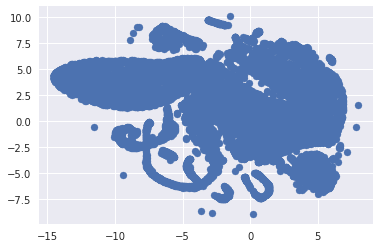

In [37]:
pyplot.scatter(X_tsne[:, 0], X_tsne[:, 1])